In [1]:
# autoreload magic
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

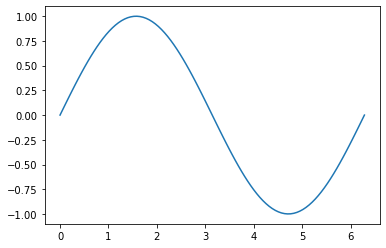

In [3]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

plt.plot(x, y)

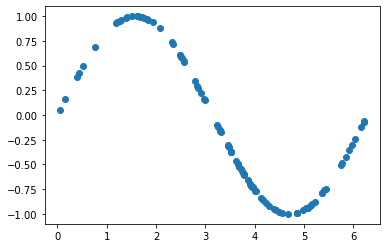

In [4]:
x_samples = np.random.uniform(0, 2*np.pi, 100)
y_samples = np.sin(x_samples)

plt.scatter(x_samples, y_samples)

In [5]:
def make_circle(c, r, res=32):
    t = np.linspace(0, 2*np.pi, res)
    x = c[0] + r*np.cos(t)
    y = c[1] + r*np.sin(t)
    return x, y

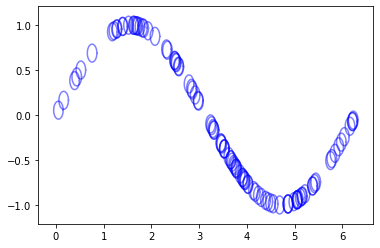

In [6]:
for x,y in zip(x_samples, y_samples):
    plt.plot(*make_circle((x,y), 0.1), c='blue', alpha=0.5)

In [7]:
def circle_intersect(data, r):
    # data: (nsamples, ndim)
    # Euclidean metric
    dist = np.linalg.norm(data[:,None] - data, axis=2)
    # check for intersection
    simplices = (dist < 2*r).astype(int)
    # remove self-intersection
    np.fill_diagonal(simplices, 0)
    # remove duplicates
    sc2 = (simplices @ simplices.T) > 2
    # remove diagonal
    np.fill_diagonal(sc2, 0)
    simplices[sc2] = 2
    return simplices

In [8]:
intersect = circle_intersect(np.array([x_samples, y_samples]).T, 0.1)
np.unique(intersect, return_counts=True)

(array([0, 1, 2]), array([9270,  134,  596]))

In [9]:
import shapely as sh

In [10]:
polygon = sh.Polygon([(0,0), (1,0), (1,1), (0,1)])

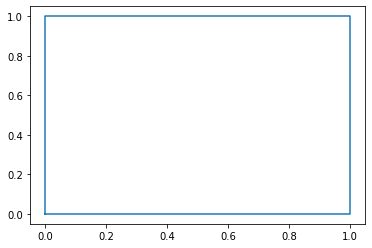

In [14]:
plt.plot(*polygon.exterior.xy)